In [78]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
from scipy import stats

In [2]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(filename, names=headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [8]:
drive_wheels_count = df['drive-wheels'].value_counts()
drive_wheels_count

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [12]:
drive_wheels_count.rename(columns={'drive-wheels':'value-counts'}, inplace=True)
drive_wheels_count.index.name='drive-wheels'
drive_wheels_count

drive-wheels
fwd    120
rwd     76
4wd      9
dtype: int64

In [21]:
df.replace("?", np.nan, inplace=True)
df["price"]=df["price"].astype("float")

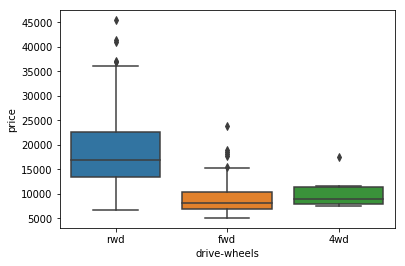

In [22]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Text(0.5,1,'scatter plot')

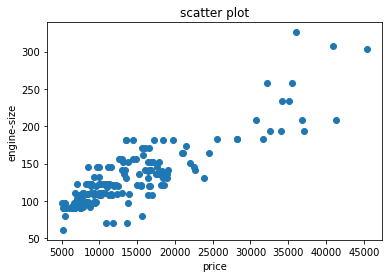

In [25]:
plt.pyplot.scatter(x=df["price"], y=df["engine-size"])
# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("engine-size")
plt.pyplot.title("scatter plot")

In [39]:
df_test = df[['drive-wheels', 'body-style', 'price']]
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_grp.head()

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000


In [40]:
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

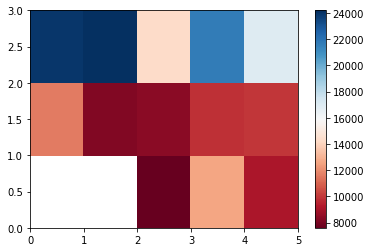

In [53]:
plt.pyplot.pcolor(df_pivot, cmap='RdBu')
plt.pyplot.colorbar()
plt.pyplot.show()

(0, 55835.44179897537)

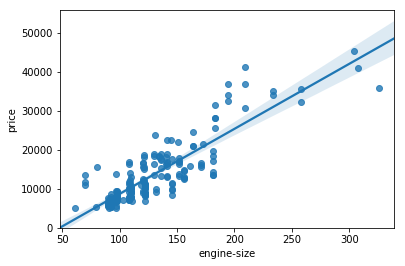

In [57]:
sns.regplot(x="engine-size", y="price", data=df)
plt.pyplot.ylim(0,)

(0, 48291.82406355141)

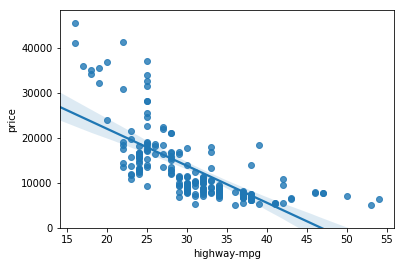

In [59]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.pyplot.ylim(0,)

In [63]:
df["peak-rpm"]=df["peak-rpm"].astype("float")

(0, 47436.208930621644)

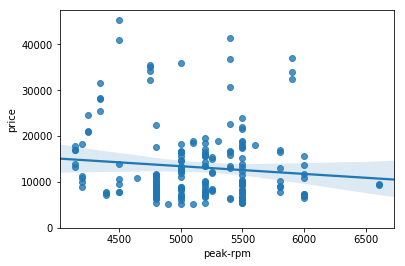

In [64]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.pyplot.ylim(0,)

In [86]:
df['horsepower']=df['horsepower'].astype(float)
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [87]:
pears_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
pears_coef, p_value

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


(nan, 1.0)

TypeError: '<=' not supported between instances of 'float' and 'str'

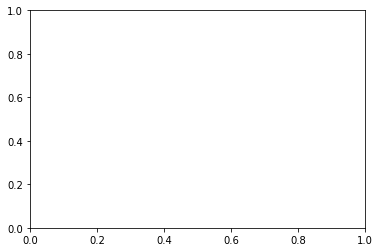

In [88]:
plt.pyplot.pcolor(df, cmap='RdBu')
plt.pyplot.colorbar()
plt.pyplot.show()